# Data analysis for tourism in Tarragona using data from the INE

In [2]:
import pandas as pd


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("2074.csv",sep="\t",encoding="latin1")
print(df.head())
print("/nColumnas: ")
print(df.columns)

  Totales Territoriales Comunidades y Ciudades Autónomas Provincias  \
0        Total Nacional                              NaN        NaN   
1        Total Nacional                              NaN        NaN   
2        Total Nacional                              NaN        NaN   
3        Total Nacional                              NaN        NaN   
4        Total Nacional                              NaN        NaN   

  Viajeros y pernoctaciones Residencia: Nivel 1 Residencia: Nivel 2  Periodo  \
0                   Viajero               Total                 NaN  2025M07   
1                   Viajero               Total                 NaN  2025M06   
2                   Viajero               Total                 NaN  2025M05   
3                   Viajero               Total                 NaN  2025M04   
4                   Viajero               Total                 NaN  2025M03   

        Total  
0  13.044.764  
1  12.256.716  
2  11.803.477  
3  10.018.537  
4   7.680.72

## Data filtering
There are columns that do not have the format or information that is not necessary.
We want to keep only:

- **Provinces** = Tarragona
- **columns of interest** = Period, Travelers and overnight stays, Residence: Level 1, Total.

### Remove numbers from province labels
We clean numerical values from the data, which do not contribute anything necessary.

In [14]:
print(df["Provincias"].unique())
df["Provincias"] = df["Provincias"].str.replace(r"^\d+\s*", "", regex=True)
print(df["Provincias"].unique())

[nan 'Almería' 'Cádiz' 'Córdoba' 'Granada' 'Huelva' 'Jaén' 'Málaga'
 'Sevilla' 'Huesca' 'Teruel' 'Zaragoza' 'Asturias' 'Balears, Illes'
 'Palmas, Las' 'Santa Cruz de Tenerife' 'Cantabria' 'Ávila' 'Burgos'
 'León' 'Palencia' 'Salamanca' 'Segovia' 'Soria' 'Valladolid' 'Zamora'
 'Albacete' 'Ciudad Real' 'Cuenca' 'Guadalajara' 'Toledo' 'Barcelona'
 'Girona' 'Lleida' 'Tarragona' 'Alicante/Alacant' 'Castellón/Castelló'
 'Valencia/València' 'Badajoz' 'Cáceres' 'Coruña, A' 'Lugo' 'Ourense'
 'Pontevedra' 'Madrid' 'Murcia' 'Navarra' 'Araba/Álava' 'Bizkaia'
 'Gipuzkoa' 'Rioja, La']
[nan 'Almería' 'Cádiz' 'Córdoba' 'Granada' 'Huelva' 'Jaén' 'Málaga'
 'Sevilla' 'Huesca' 'Teruel' 'Zaragoza' 'Asturias' 'Balears, Illes'
 'Palmas, Las' 'Santa Cruz de Tenerife' 'Cantabria' 'Ávila' 'Burgos'
 'León' 'Palencia' 'Salamanca' 'Segovia' 'Soria' 'Valladolid' 'Zamora'
 'Albacete' 'Ciudad Real' 'Cuenca' 'Guadalajara' 'Toledo' 'Barcelona'
 'Girona' 'Lleida' 'Tarragona' 'Alicante/Alacant' 'Castellón/Castelló'
 'Val

In [15]:
df_Tarragona = df[df["Provincias"] == "Tarragona"].copy()
df_Tarragona.head()

,Totales Territoriales,Comunidades y Ciudades Autónomas,Provincias,Viajeros y pernoctaciones,Residencia: Nivel 1,Residencia: Nivel 2,Periodo,Total
1806,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,NaN,2025M07,483.884
1807,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,NaN,2025M06,467.360
1808,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,NaN,2025M05,406.789
1809,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,NaN,2025M04,322.412
1810,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,NaN,2025M03,79.586


### Format Total values as numbers

In [18]:
df_Tarragona["Total"] = (df_Tarragona["Total"].astype(str).str.replace(".", "", regex=False).astype(int))
df_Tarragona.head()

,Totales Territoriales,Comunidades y Ciudades Autónomas,Provincias,Viajeros y pernoctaciones,Residencia: Nivel 1,Residencia: Nivel 2,Periodo,Total
1806,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,NaN,2025M07,483884
1807,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,NaN,2025M06,467360
1808,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,NaN,2025M05,406789
1809,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,NaN,2025M04,322412
1810,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,NaN,2025M03,79586


### Prepare the Period field
The INE reports it as "2025M07", "2025M06", etc.
We'll divide it into Year and Month, so we can graph it by time.

In [20]:
df_Tarragona["Año"] = df_Tarragona["Periodo"].str[:4].astype(int)
df_Tarragona["Mes"] = df_Tarragona["Periodo"].str[-2:].astype(int)

df_Tarragona.head()

,Totales Territoriales,Comunidades y Ciudades Autónomas,Provincias,Viajeros y pernoctaciones,Residencia: Nivel 1,Residencia: Nivel 2,Periodo,Total,Año,Mes
1806,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,NaN,2025M07,483884,2025,7
1807,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,NaN,2025M06,467360,2025,6
1808,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,NaN,2025M05,406789,2025,5
1809,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,NaN,2025M04,322412,2025,4
1810,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,NaN,2025M03,79586,2025,3


In [30]:
df_Tarragona["Fecha"] = pd.to_datetime(
    df_Tarragona["Periodo"].str.replace("M", "-"),  # "2025M07" -> "2025-07"
    format="%Y-%m"
)

## Data Analisys
### Evolution of time travelers


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

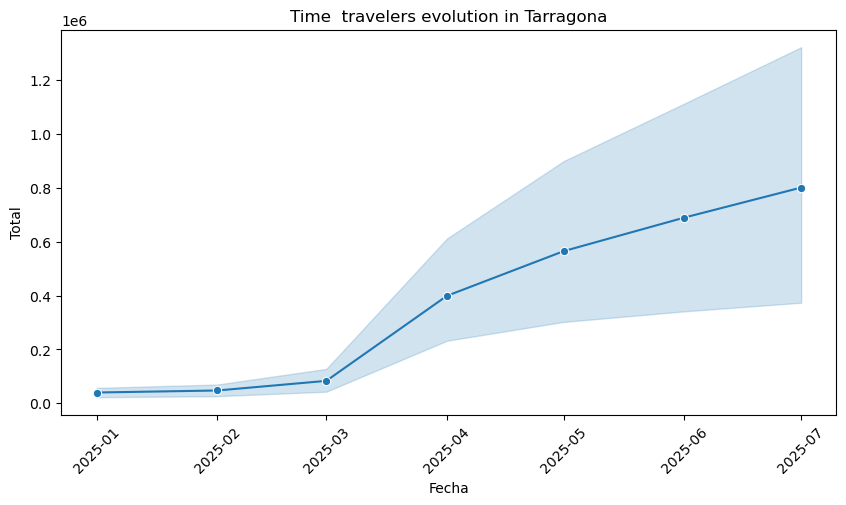

In [32]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Fecha", y="Total", data=df_Tarragona, marker="o")
plt.xticks(rotation=45)
plt.title("Time  travelers evolution in Tarragona")
plt.show()

#### Evolución de viajeros en Tarragona (2025)
The graph clearly shows the seasonality of tourism in Tarragona:

- Tourism in Tarragona shows a **clear seasonality**.
- In winter (January-March), traveler arrivals are minimal (<100,000).
- Sustained growth is observed starting in April.
- The **peak** is reached in summer, with more than 800,000 travelers in July.
- This confirms that Tarragona relies heavily on summer tourism.

This is typical of coastal tourist areas: travelers arrive en masse in summer, while activity is very low in winter.

### National vs. foreign tourists comparison in Tarragona 

In [37]:


df_Tarragona_res = df_Tarragona[df_Tarragona["Residencia: Nivel 2"].isin(["Residentes en España", "Residentes en el Extranjero"])]
df_Tarragona_res.head()

,Totales Territoriales,Comunidades y Ciudades Autónomas,Provincias,Viajeros y pernoctaciones,Residencia: Nivel 1,Residencia: Nivel 2,Periodo,Total,Año,Mes,Fecha
1813,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,Residentes en España,2025M07,249608,2025,7,2025-07-01
1814,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,Residentes en España,2025M06,271823,2025,6,2025-06-01
1815,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,Residentes en España,2025M05,212041,2025,5,2025-05-01
1816,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,Residentes en España,2025M04,192801,2025,4,2025-04-01
1817,Total Nacional,09 Cataluña,Tarragona,Viajero,Total,Residentes en España,2025M03,61393,2025,3,2025-03-01


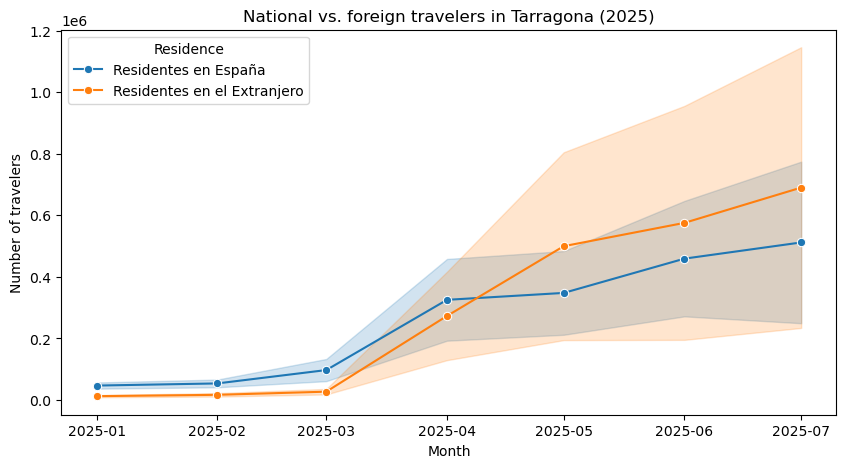

In [40]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Fecha", y="Total", hue="Residencia: Nivel 2",data=df_Tarragona_res, marker="o")

plt.title("National vs. foreign travelers in Tarragona (2025)")
plt.xlabel("Month")
plt.ylabel("Number of travelers")
plt.legend(title="Residence")
plt.show()

#### Nationals vs. Foreigners in Tarragona (2025)

- In winter (January-March), **national travelers** predominate, with very few foreigners.
- From spring onwards, both groups grow, but nationals remain in the majority.
- In summer (June-July), **foreign tourists outnumber nationals**, reaching almost 1 million in July.
- This confirms that **international tourism is the main driver of summer in Tarragona**, while national tourism sustains activity during the low season.

### Proportion of nationals vs. foreigners each month

In [43]:

df_pivot = df_Tarragona_res.pivot_table(
    index="Fecha",
    columns="Residencia: Nivel 2",
    values="Total",
    aggfunc="sum"
).reset_index()

df_pivot.head()


Residencia: Nivel 2,Fecha,Residentes en España,Residentes en el Extranjero
0,2025-01-01,94025,25248
1,2025-02-01,107966,33911
2,2025-03-01,194784,54363
3,2025-04-01,651162,546350
4,2025-05-01,696077,999769


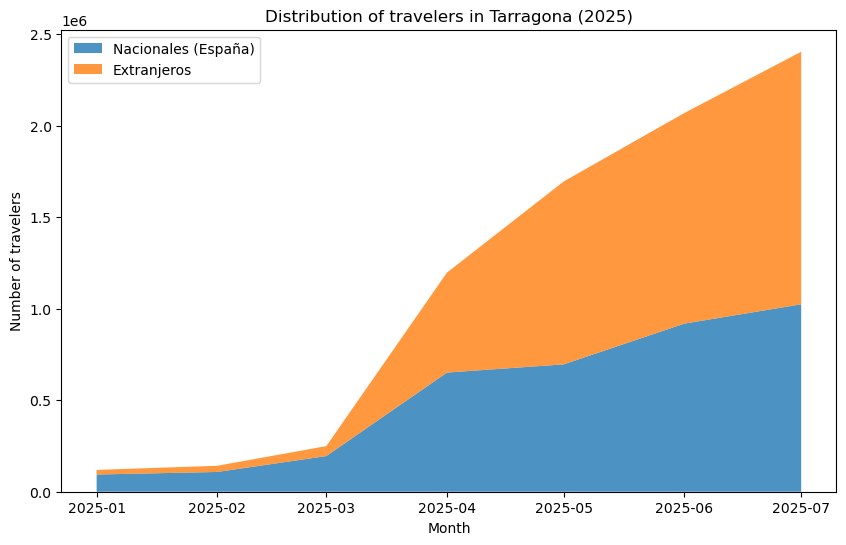

In [46]:
plt.figure(figsize=(10,6))
plt.stackplot(
    df_pivot["Fecha"],
    df_pivot["Residentes en España"],
    df_pivot["Residentes en el Extranjero"],
    labels=["Nacionales (España)", "Extranjeros"],
    colors=["#1f77b4", "#ff7f0e"],
    alpha=0.8
)

plt.title("Distribution of travelers in Tarragona (2025)")
plt.xlabel("Month")
plt.ylabel("Number of travelers")
plt.legend(loc="upper left")
plt.show()


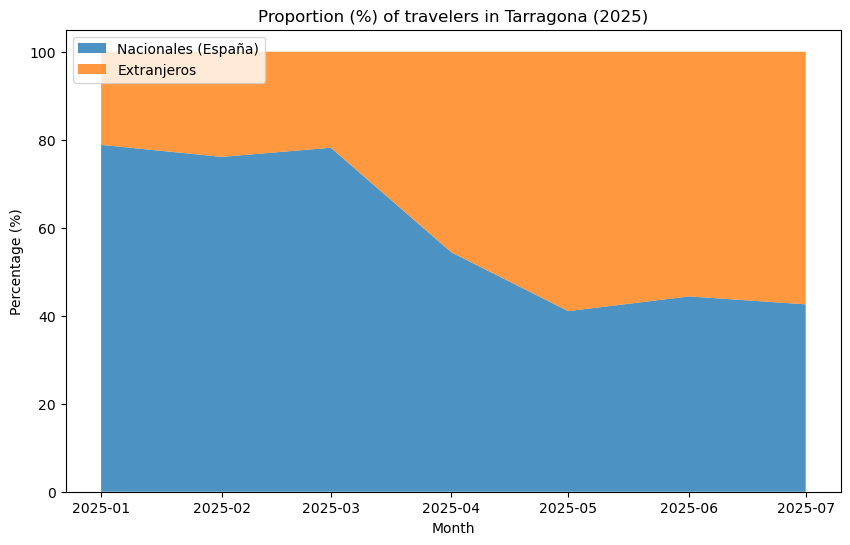

In [48]:
df_pivot_pct = df_pivot.copy()
total = df_pivot_pct["Residentes en España"] + df_pivot_pct["Residentes en el Extranjero"]
df_pivot_pct["Residentes en España"] = df_pivot_pct["Residentes en España"] / total * 100
df_pivot_pct["Residentes en el Extranjero"] = df_pivot_pct["Residentes en el Extranjero"] / total * 100

plt.figure(figsize=(10,6))
plt.stackplot(
    df_pivot_pct["Fecha"],
    df_pivot_pct["Residentes en España"],
    df_pivot_pct["Residentes en el Extranjero"],
    labels=["Nacionales (España)", "Extranjeros"],
    colors=["#1f77b4", "#ff7f0e"],
    alpha=0.8
)

plt.title("Proportion (%) of travelers in Tarragona (2025)")
plt.xlabel("Month")
plt.ylabel("Percentage (%)")
plt.legend(loc="upper left")
plt.show()


####  Nationals vs Foreign Travelers in Tarragona (2025)

#####  Chart 1 – Absolute Values
- **January–March:** the number of travelers is low (<200k), with nationals clearly dominating.  
- **April–May:** tourism rises to ~1M travelers; foreigners increase strongly and almost equal nationals.  
- **June–July:** the total reaches ~2.5M travelers; growth is mainly driven by foreigners, who clearly surpass nationals.  

In absolute numbers, **international tourism is the main driver of Tarragona’s summer season**, while nationals sustain the baseline throughout the year.  

---

#####  Chart 2 – Proportions (%)
- **January–March:** nationals represent about **75–80%** of the total.  
- **April–May:** foreigners grow rapidly, reaching nearly 50% of the total.  
- **June–July:** foreigners become the dominant group, exceeding **55–60%** of all travelers.  

 In relative terms, Tarragona shifts from being a **domestic destination in winter** to an **international destination in summer**.  

---

#####  Overall Conclusion
Tourism in Tarragona is **doubly seasonal**:  
- In winter, it relies mainly on **domestic travelers**.  
- In summer, growth is largely sustained by **international visitors**.  

 **Key insight:** Tarragona’s tourism economy depends on the domestic market as a base, but relies heavily on international tourism during the high season.
